In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [6]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()

,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.shape

(5572, 2)

In [9]:
df1['Spam or Ham'].value_counts()

ham     4825
spam     747
Name: Spam or Ham, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam or Ham'] = encoder.fit_transform(df1['Spam or Ham'])

In [11]:
df1.duplicated().sum()

403

In [12]:
df1 = df1.drop_duplicates(keep = 'first')

In [13]:
df1.duplicated().sum()

0

([<matplotlib.patches.Wedge at 0x26b32acd910>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.1067270163085225, -0.4638483711007676, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87%'),
  Text(0.6455907595133047, -0.2705782164754477, '13%')])

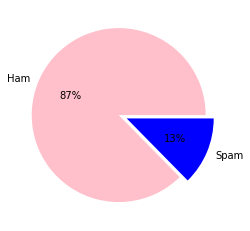

In [14]:
labels=['Ham','Spam']
explode=[0,0.1]
colors=['pink','blue']
plt.pie(df1['Spam or Ham'].value_counts(),labels=labels,explode=explode,colors=colors,autopct="%.0f%%")

In [15]:
X =  df1["Mail Message"]
y =df1["Spam or Ham"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
#Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [20]:
mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred

array([0])

In [21]:
model.score(X_train_count,y_train)

0.9929866989117292

In [22]:
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9816247582205029

In [23]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train_count,y_train)

DecisionTreeClassifier()

In [24]:
model2.score(X_train_count,y_train)

1.0

In [25]:
model.score(X_test_count,y_test)

0.9816247582205029